In [89]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
weather = pd.read_csv(r"C:\Users\nidha\Downloads\weather.csv", index_col="DATE")

In [90]:
weather

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01,WV03,WV20
DATE,,,,,,,,,,,,,,,,,,,,,
1/1/2000,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",9.62,1226.0,1133.0,0.00,0.0,0.0,34.0,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2/2000,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",11.18,1843.0,1842.0,0.20,0.0,0.0,43.0,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/3/2000,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",14.76,1227.0,1226.0,0.06,0.0,0.0,32.0,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2000,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",13.65,906.0,906.0,0.07,0.2,0.0,29.0,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/5/2000,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",8.05,2236.0,2236.0,0.00,0.0,0.0,26.0,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2023,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",9.17,NaN,NaN,0.20,0.0,0.0,NaN,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/28/2023,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",12.53,NaN,NaN,0.11,0.0,0.0,NaN,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/29/2023,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",7.38,NaN,NaN,0.13,0.0,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# Filter out columns with less than 5% missing values
null_pct = weather.isnull().sum() / weather.shape[0]
valid_columns = weather.columns[null_pct < 0.05]
weather = weather[valid_columns].copy()
weather = weather.ffill()
weather.columns = weather.columns.str.lower()

# Convert index to datetime
weather.index = pd.to_datetime(weather.index)

In [92]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,
2000-01-01,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",9.62,0.00,0.0,0.0,43,25,240.0,240.0,16.1,19.9
2000-01-02,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",11.18,0.20,0.0,0.0,54,31,240.0,240.0,25.9,34.0
2000-01-03,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",14.76,0.06,0.0,0.0,36,27,60.0,60.0,25.1,31.1
2000-01-04,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",13.65,0.07,0.2,0.0,33,24,280.0,280.0,28.0,32.0
2000-01-05,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",8.05,0.00,0.0,0.0,29,22,190.0,190.0,23.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",9.17,0.20,0.0,0.0,50,42,350.0,330.0,16.1,21.0
2023-12-28,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",12.53,0.11,0.0,0.0,43,41,40.0,40.0,19.9,25.9
2023-12-29,USW00014845,"SAGINAW MBS INTERNATIONAL AIRPORT, MI US",7.38,0.13,0.0,0.0,42,30,350.0,350.0,16.1,19.0


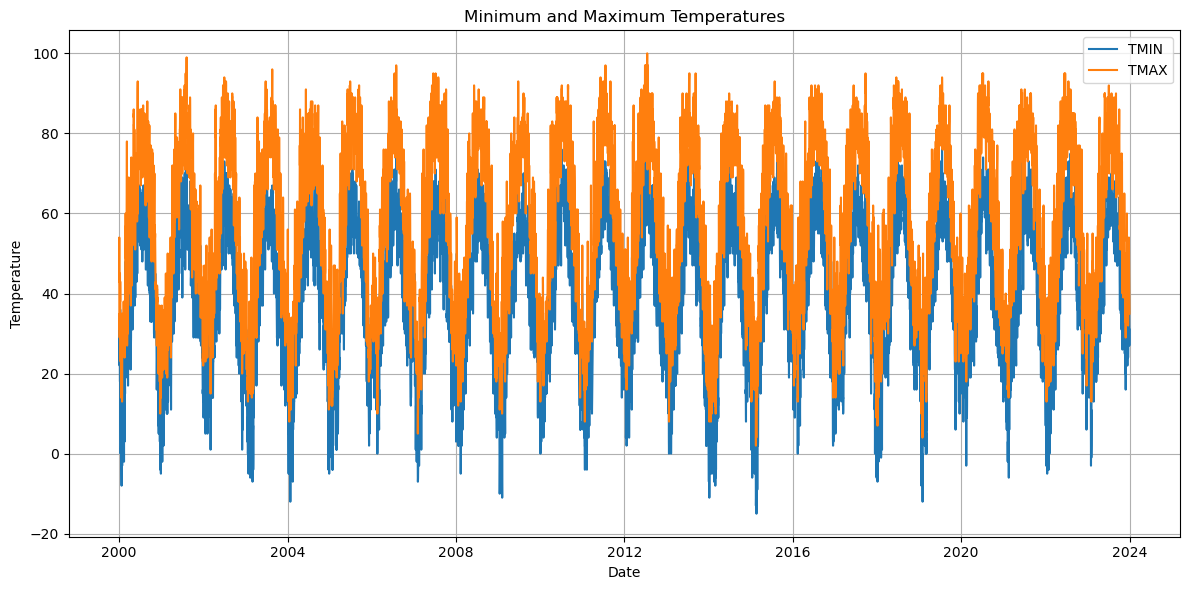

In [93]:
# Plot the graph of TMIN and TMAX
plt.figure(figsize=(12, 6))
plt.plot(weather.index, weather['tmin'], label='TMIN')
plt.plot(weather.index, weather['tmax'], label='TMAX')
plt.title('Minimum and Maximum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:

# Create target variables by shifting tmin and tmax
weather['target_tmin'] = weather['tmin'].shift(-365)
weather['target_tmax'] = weather['tmax'].shift(-365) 


# Drop rows with NaN targets 
weather = weather.dropna(subset=['target_tmin', 'target_tmax'])

# Select features and target variables
X = weather[['awnd', 'prcp', 'snow', 'snwd', 'tmax', 'tmin']]
y_tmin = weather['target_tmin']
y_tmax = weather['target_tmax']

# Split the data into training and testing sets using data from 2000 to 2023
X_train = X.loc['2000':'2023']
y_train_tmin = y_tmin.loc['2000':'2023']
y_train_tmax = y_tmax.loc['2000':'2023']

# Train Random Forest models for tmin and tmax
model_tmin = RandomForestRegressor(n_estimators=100, random_state=42)
model_tmin.fit(X_train, y_train_tmin)

model_tmax = RandomForestRegressor(n_estimators=100, random_state=42)
model_tmax.fit(X_train, y_train_tmax)

# Use the trained models to predict tmin and tmax for the next 1_year
predicted_tmin_next_1_year = model_tmin.predict(X.tail(365))
predicted_tmax_next_1_year = model_tmax.predict(X.tail(365))

# Create a DataFrame to display the predicted temperatures for the next 1_year
predicted_temperatures_next_1_year = pd.DataFrame({
    'Predicted_TMIN': predicted_tmin_next_1_year,
    'Predicted_TMAX': predicted_tmax_next_1_year
}, index=pd.date_range(start=weather.index[-1] + pd.Timedelta(days=1), periods=365))




In [100]:
import pandas as pd

# Create a range of dates for 2024
dates_2024 = pd.date_range(start='2024-01-01', end='2024-12-31')

# Trim the last element from the index
dates_2024_trimmed = dates_2024[:-1]

# Create an empty DataFrame with the trimmed index of 2024
predicted_temperatures_2024 = pd.DataFrame(index=dates_2024_trimmed)

# Store the predicted values in the DataFrame
predicted_temperatures_2024['Predicted_TMIN'] = predicted_tmin_next_1_year
predicted_temperatures_2024['Predicted_TMAX'] = predicted_tmax_next_1_year

# Display the DataFrame
print(predicted_temperatures_2024)


            Predicted_TMIN  Predicted_TMAX
2024-01-01           27.72           38.85
2024-01-02           28.44           34.61
2024-01-03           27.56           35.52
2024-01-04           27.92           36.32
2024-01-05           25.30           34.75
...                    ...             ...
2024-12-26           32.86           42.21
2024-12-27           31.83           39.52
2024-12-28           29.00           39.08
2024-12-29           30.39           45.84
2024-12-30           27.33           33.95

[365 rows x 2 columns]


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use the trained models to predict tmin and tmax for the next 1year
predicted_tmin_next_6_months = model_tmin.predict(X.tail(365))
predicted_tmax_next_6_months = model_tmax.predict(X.tail(365))

# Calculate evaluation metrics for TMIN
mae_tmin = mean_absolute_error(y_tmin.tail(365), predicted_tmin_next_1_year)
mse_tmin = mean_squared_error(y_tmin.tail(365), predicted_tmin_next_1_year)
rmse_tmin = np.sqrt(mse_tmin)

# Calculate evaluation metrics for TMAX
mae_tmax = mean_absolute_error(y_tmax.tail(365), predicted_tmax_next_1_year)
mse_tmax = mean_squared_error(y_tmax.tail(365), predicted_tmax_next_1_year)
rmse_tmax = np.sqrt(mse_tmax)

print("Evaluation metrics for TMIN:")
print("Mean Absolute Error (MAE):", mae_tmin)
print("Mean Squared Error (MSE):", mse_tmin)
print("Root Mean Squared Error (RMSE):", rmse_tmin)
print("\nEvaluation metrics for TMAX:")
print("Mean Absolute Error (MAE):", mae_tmax)
print("Mean Squared Error (MSE):", mse_tmax)
print("Root Mean Squared Error (RMSE):", rmse_tmax)


Evaluation metrics for TMIN:
Mean Absolute Error (MAE): 3.0186375081539465
Mean Squared Error (MSE): 14.69370027422887
Root Mean Squared Error (RMSE): 3.8332362664240867

Evaluation metrics for TMAX:
Mean Absolute Error (MAE): 3.365735942596217
Mean Squared Error (MSE): 19.172591416078028
Root Mean Squared Error (RMSE): 4.378651780637281


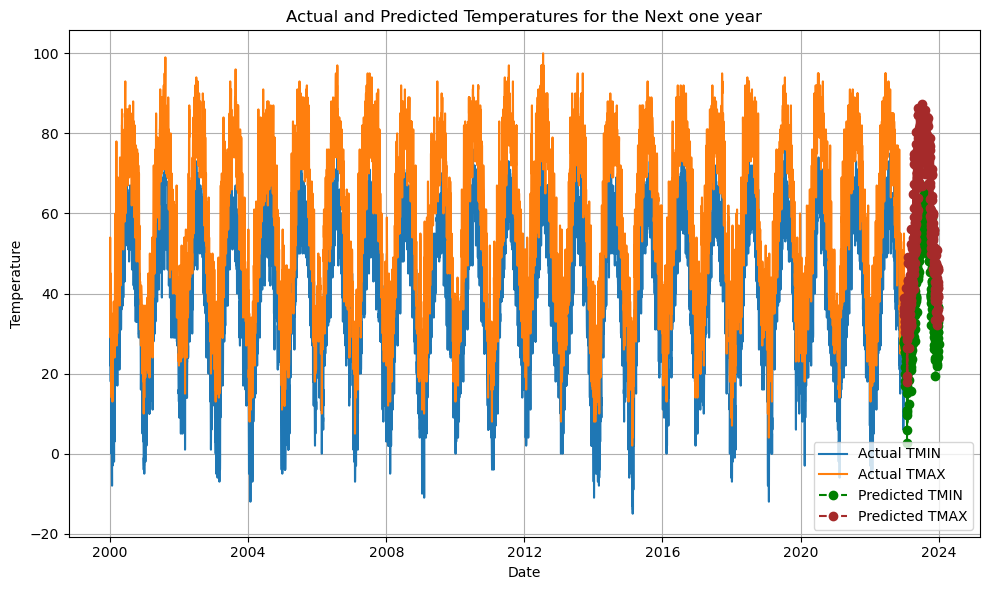

In [97]:

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(weather.index, weather['tmin'], label='Actual TMIN')
plt.plot(weather.index, weather['tmax'], label='Actual TMAX')
plt.plot(predicted_temperatures_next_1_year.index, predicted_temperatures_next_1_year['Predicted_TMIN'], marker='o', linestyle='--', color='green', label='Predicted TMIN')
plt.plot(predicted_temperatures_next_1_year.index, predicted_temperatures_next_1_year['Predicted_TMAX'], marker='o', linestyle='--', color='brown', label='Predicted TMAX')
plt.title('Actual and Predicted Temperatures for the Next one year')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()